# Linear Models

1. Two variables are connected by a linear relationship, which is a linear model of yours.
    - 1 dependent and 1 independent variables
    - or, $y$ and $x$
    - or, 1 predictor variable and 1 response variable
    - or, 1 feature and 1 output
    
2. continuous and discrete
    - continuous
    - discrete categorical
    - discrete ordinal variable is a categorical but has an ordering.
        - Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories is not known. See [Ordinal Data in Wikipedia](https://en.wikipedia.org/wiki/Ordinal_data).
        
1. Correlation and causality
1. How to calculate a meaningful line which provides the relationship of the intended model.
    1. Point-wise estimation
        1. Maximum Likelihood Estimation
        2. Maximum A Posteriori Estimation - Bayesian Model
    1. Bayesian Density estimation
        - parametric or non-parametric (or semi-parametric)
        - pymc3
1. Data normalization helps us
    1. when we choose density models
    1. when we analyze the result
    1. when we have several variables (not just one predictor variable)

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats

from scipy.interpolate import griddata

In [2]:
%config InlineBackend.figure_format = 'retina'
# az.style.use('arviz-darkgrid')
%load_ext watermark
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

#### Simulation of field trip

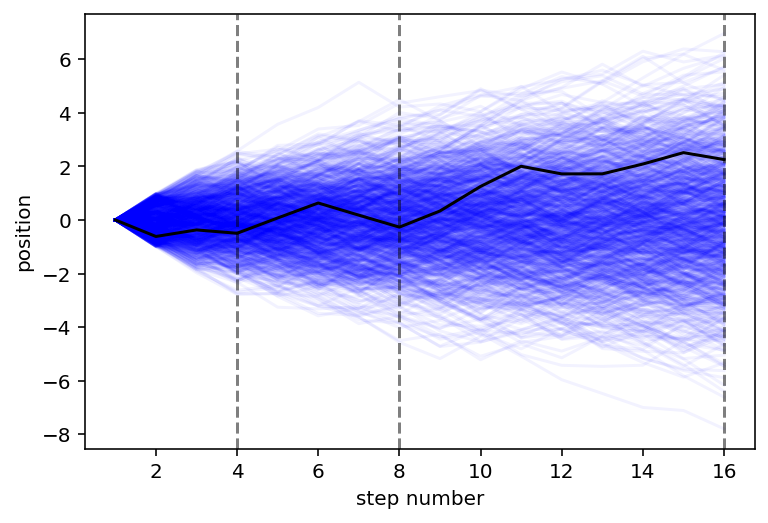

In [3]:
np.random.seed(1234)
steps = 16
repetitions = 1000
x = np.zeros([steps, repetitions])
for i in range(x.shape[1]):
    x[1:, i] = np.cumsum(np.random.uniform(-1, 1, steps - 1))

plt.plot(range(1, 17), x[:, :], c="b", alpha=0.05)
plt.plot(range(1, 17), x[:, 0], c="k")
plt.axvline(4, linestyle="--", c="k", alpha=0.5)
plt.axvline(8, linestyle="--", c="k", alpha=0.5)
plt.axvline(16, linestyle="--", c="k", alpha=0.5)
plt.xlabel("step number")
plt.ylabel("position")
plt.show()

ValueError: v cannot be empty

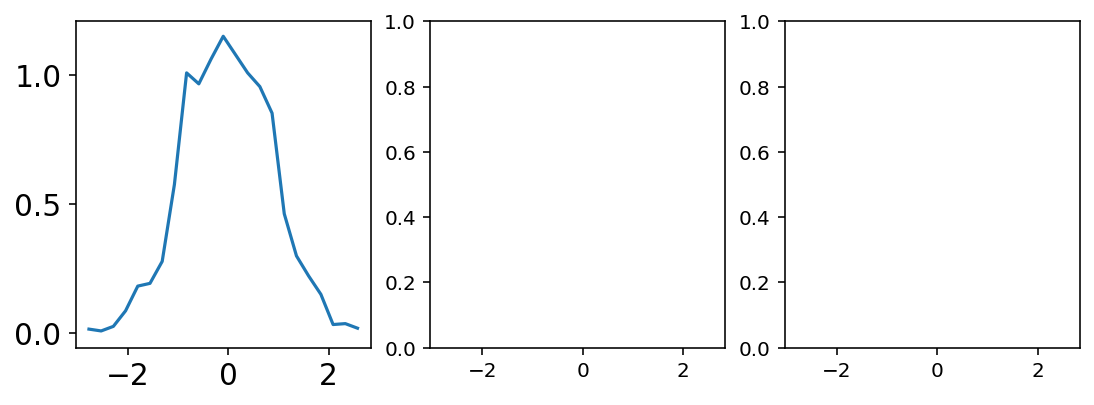

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharex=True)
az.plot_kde(x[1:4, :], ax=ax[0], bw=.1)
az.plot_kde(x[1:8, :], ax=ax[1], bw=.1)
sns.distplot(x[1:, :], kde_kws={"bw": 0.01}, ax=ax[2], hist=False)

ax[0].set_title("4 steps")
ax[1].set_title("8 steps")
ax[2].set_title("16 steps")

for i in range(3):
    ax[i].set_ylabel("Density")
    ax[i].set_xlabel("Position")
    ax[i].set_xlim(-6, 6)
    ax[i].set_xticks([-6, -3, 0, 3, 6])

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density

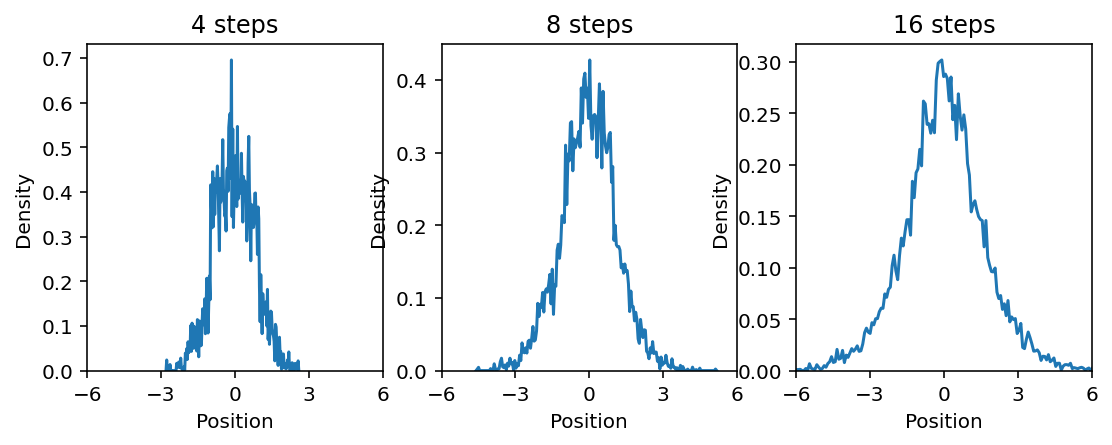

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharex=True)
sns.distplot(x[1:4, :], kde_kws={"bw": 0.01}, ax=ax[0], hist=False)
sns.distplot(x[1:8, :], kde_kws={"bw": 0.01}, ax=ax[1], hist=False)
sns.distplot(x[1:, :], kde_kws={"bw": 0.01}, ax=ax[2], hist=False)

ax[0].set_title("4 steps")
ax[1].set_title("8 steps")
ax[2].set_title("16 steps")

for i in range(3):
    ax[i].set_ylabel("Density")
    ax[i].set_xlabel("Position")
    ax[i].set_xlim(-6, 6)
    ax[i].set_xticks([-6, -3, 0, 3, 6])

#### Code 4.1

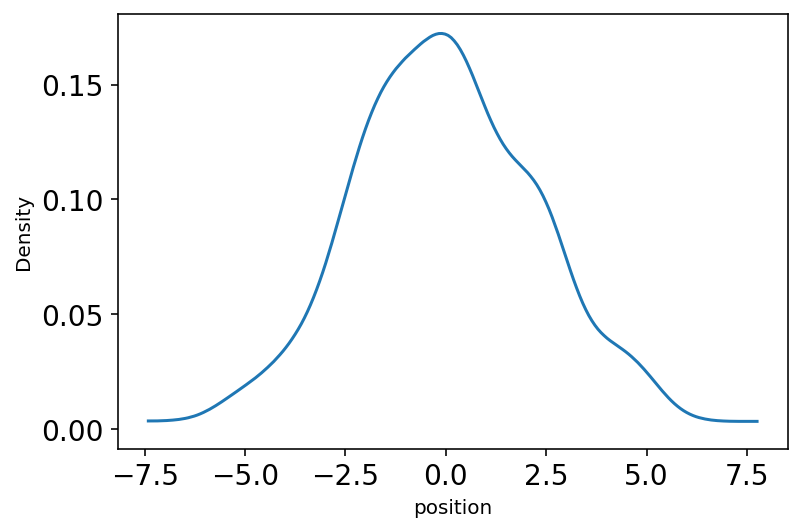

In [5]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
az.plot_kde(pos)
plt.xlabel("position")
plt.ylabel("Density");

#### Code 4.2 and 4.3

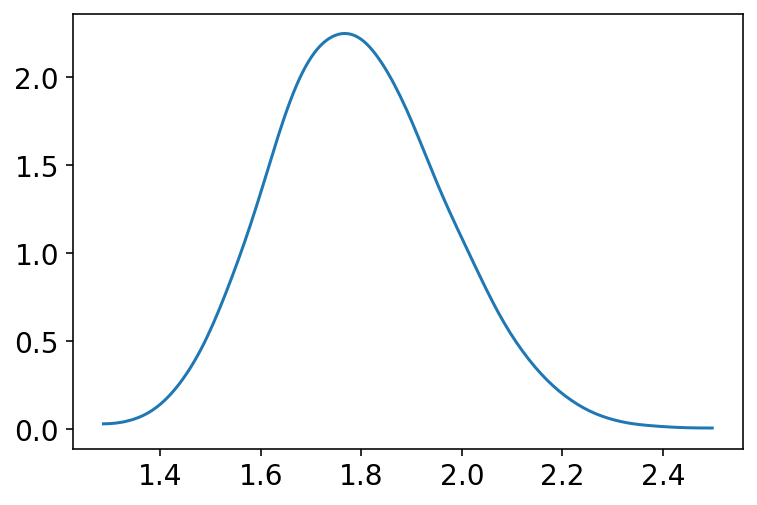

In [6]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos);

#### Code 4.4

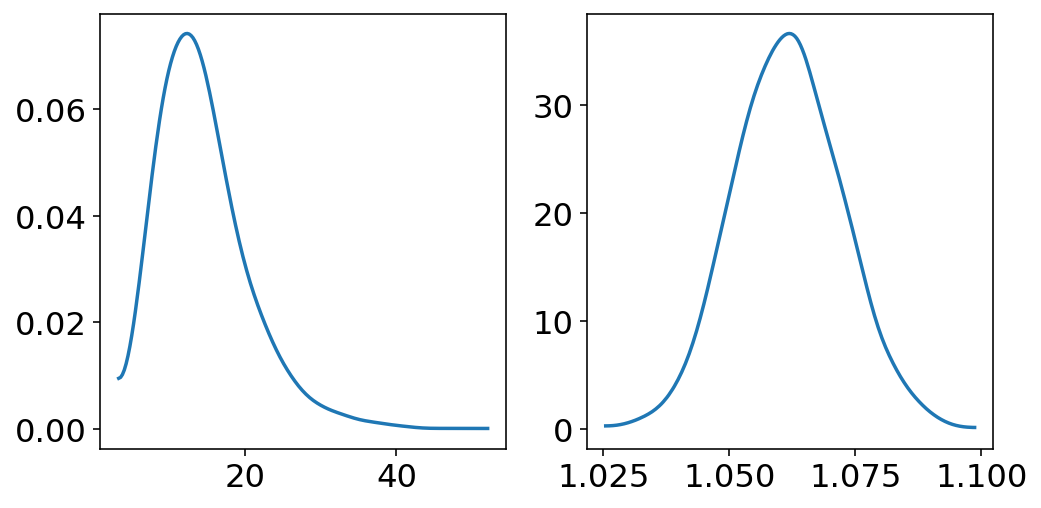

In [7]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1, 2, figsize=(8, 4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1]);

#### Code 4.5

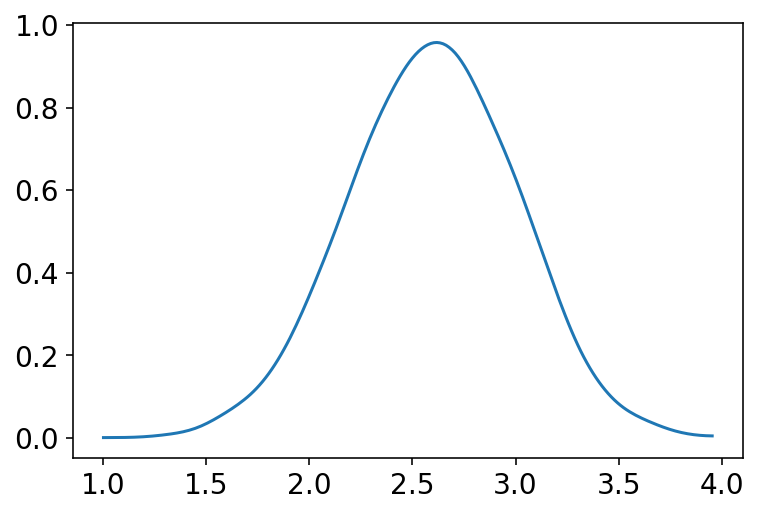

In [8]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(log_big);

#### Code 4.6

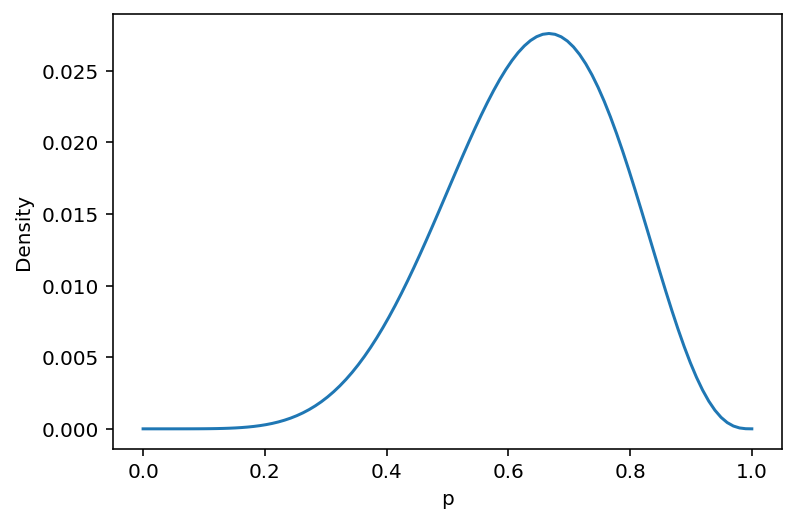

In [9]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior)
plt.xlabel("p")
plt.ylabel("Density");

#### Code 4.7 and 4.8

In [25]:
d = pd.read_csv("Data/Howell1.csv", sep=";", header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


#### Code 4.9

In [26]:
az.summary(d.to_dict(orient="list"), kind="stats")

,mean,sd,hdi_5.5%,hdi_94.5%
height,138.264,27.602,90.805,170.180
weight,35.611,14.719,11.368,55.707
age,29.344,20.747,0.000,57.000
male,0.472,0.500,0.000,1.000


#### Code 4.10

In [27]:
d.height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

#### Code 4.11

In [28]:
d2 = d[d.age >= 18]

#### Code 4.12

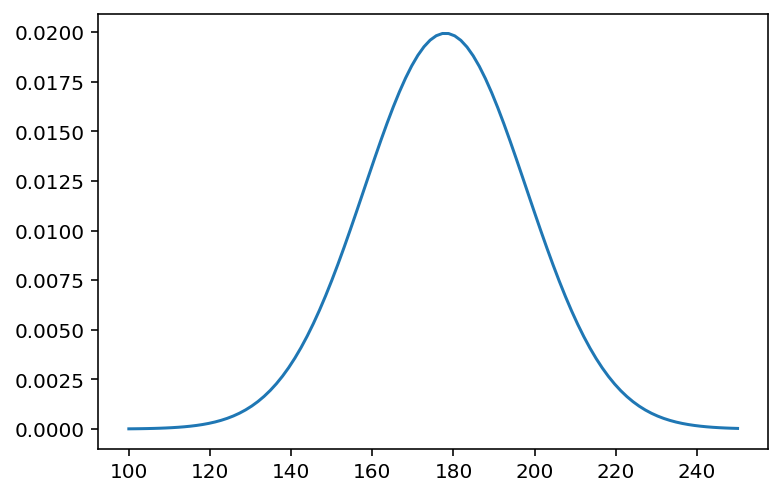

In [29]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.13

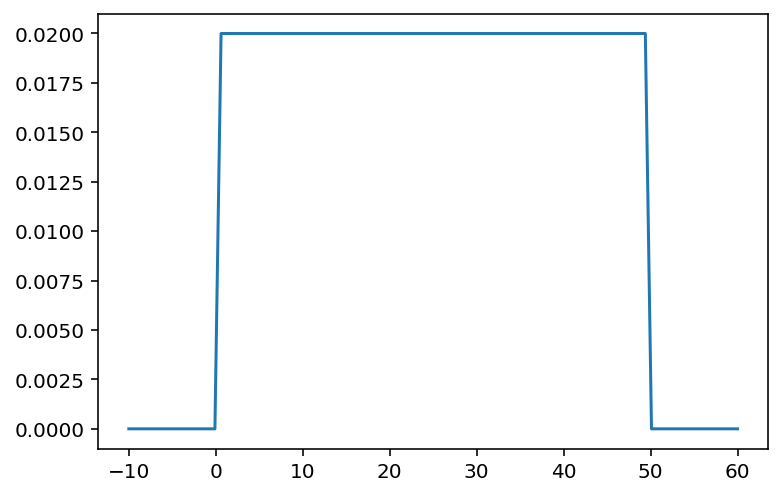

In [30]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.14

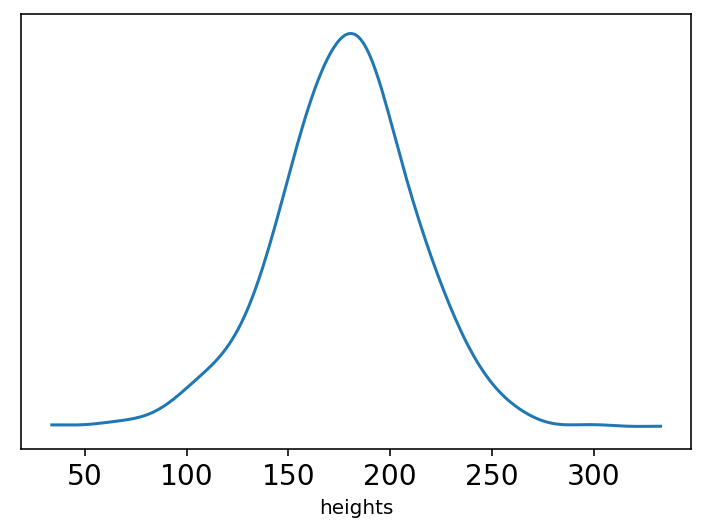

In [31]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.15

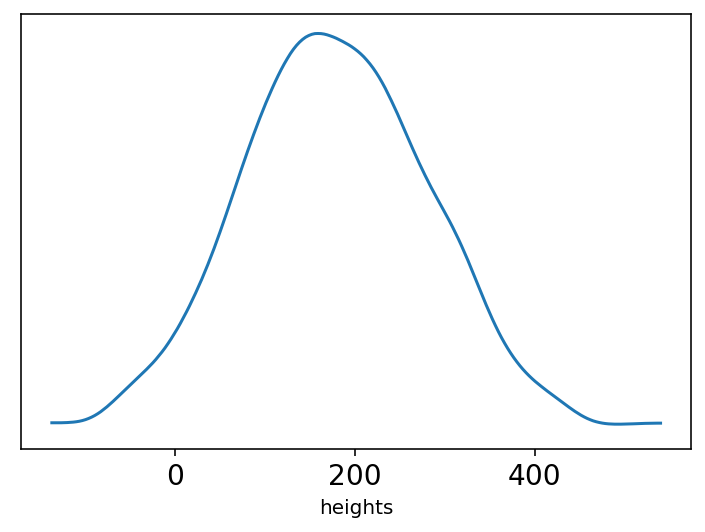

In [32]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=100, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.16

In [33]:
post = np.mgrid[150:160:0.05, 7:9:0.05].reshape(2, -1).T

likelihood = [
    sum(stats.norm.logpdf(d2.height, loc=post[:, 0][i], scale=post[:, 1][i]))
    for i in range(len(post))
]

post_prod = (
    likelihood
    + stats.norm.logpdf(post[:, 0], loc=178, scale=20)
    + stats.uniform.logpdf(post[:, 1], loc=0, scale=50)
)
post_prob = np.exp(post_prod - max(post_prod))

#### Code 4.17

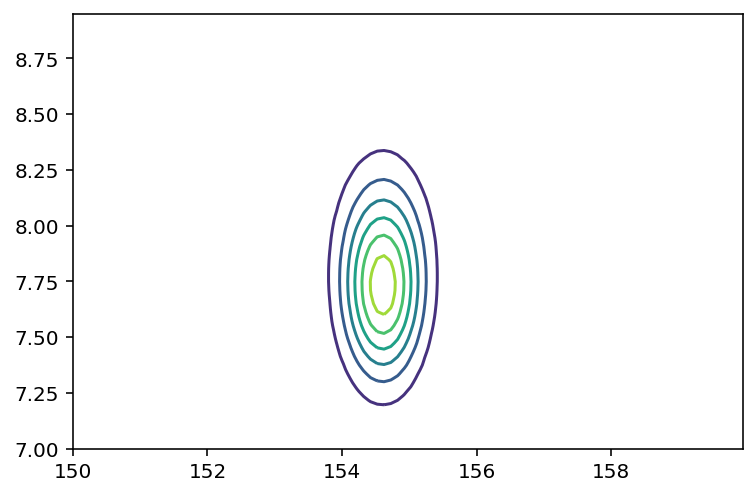

In [34]:
xi = np.linspace(post[:, 0].min(), post[:, 0].max(), 100)
yi = np.linspace(post[:, 1].min(), post[:, 1].max(), 100)
zi = griddata((post[:, 0], post[:, 1]), post_prob, (xi[None, :], yi[:, None]))

plt.contour(xi, yi, zi);

#### Code 4.18

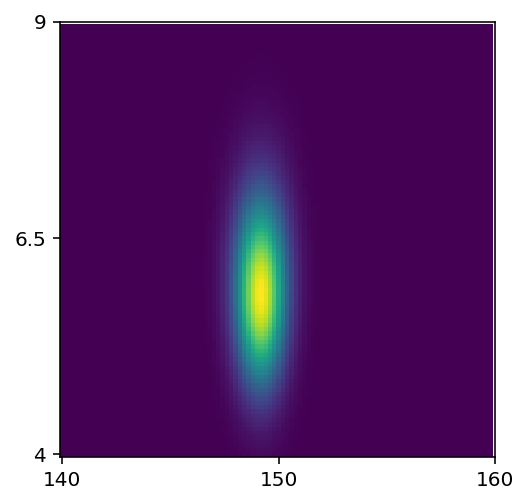

In [37]:
_, ax = plt.subplots()
ax.imshow(zi, origin="lower")
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([140, 150, 160])
ax.set_yticks([0, 50, 100])
ax.set_yticklabels([4, 6.5, 9])
ax.grid(False);

#### Code 4.19 and 4.20

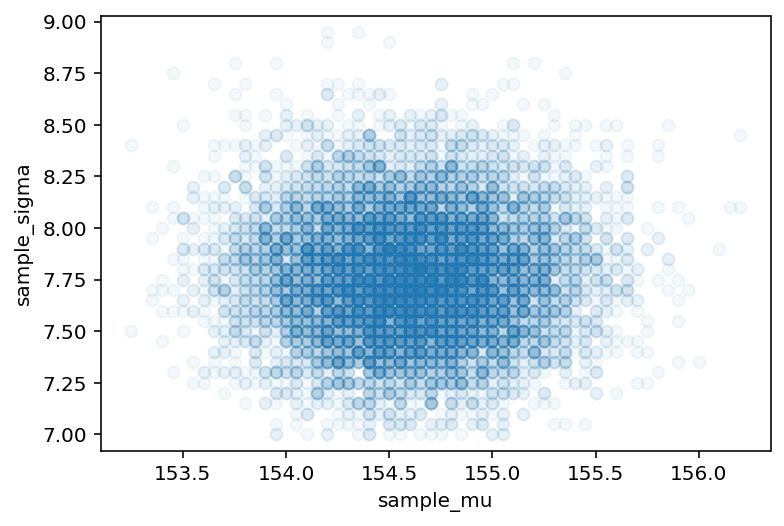

In [38]:
sample_rows = np.random.choice(
    np.arange(len(post)), size=10000, replace=True, p=(post_prob / post_prob.sum())
)
sample_mu = post[:, 0][sample_rows]
sample_sigma = post[:, 1][sample_rows]

plt.plot(sample_mu, sample_sigma, "o", alpha=0.05)
plt.axis("equal")
plt.grid(False)
plt.xlabel("sample_mu")
plt.ylabel("sample_sigma");

#### Code 4.21

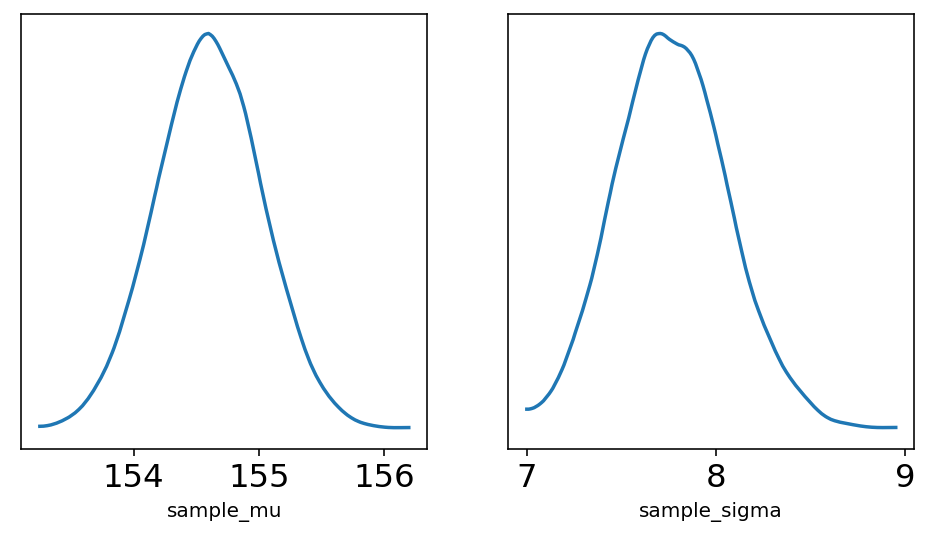

In [39]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
az.plot_kde(sample_mu, ax=ax[0])
ax[0].set_xlabel("sample_mu")
ax[0].set_yticks([])
az.plot_kde(sample_sigma, ax=ax[1])
ax[1].set_xlabel("sample_sigma")
ax[1].set_yticks([]);

#### Code 4.22

In [40]:
az.hpd(sample_mu), az.hpd(sample_sigma)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


(array([153.9, 155.2]), array([7.3, 8.2]))

#### Code 4.23 and  4.24

In [41]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2, -1).T

likelihood2 = [
    sum(stats.norm.logpdf(d3, loc=post2[:, 0][i], scale=post2[:, 1][i]))
    for i in range(len(post2))
]

post_prod2 = (
    likelihood2
    + stats.norm.logpdf(post2[:, 0], loc=178, scale=20)
    + stats.uniform.logpdf(post2[:, 1], loc=0, scale=50)
)

post_prob2 = np.exp(post_prod2 - max(post_prod2))

sample_rows2 = np.random.choice(
    np.arange(len(post2)), size=10000, replace=True, p=(post_prob2 / post_prob2.sum())
)
sample_mu2 = post2[:, 0][sample_rows2]
sample_sigma2 = post2[:, 1][sample_rows2]

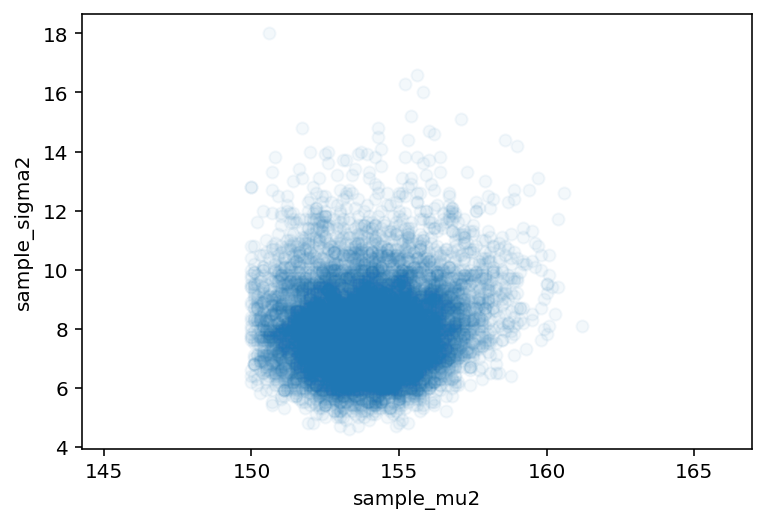

In [42]:
plt.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
plt.axis("equal")
plt.xlabel("sample_mu2")
plt.ylabel("sample_sigma2")
plt.grid(False);

#### Code 4.25

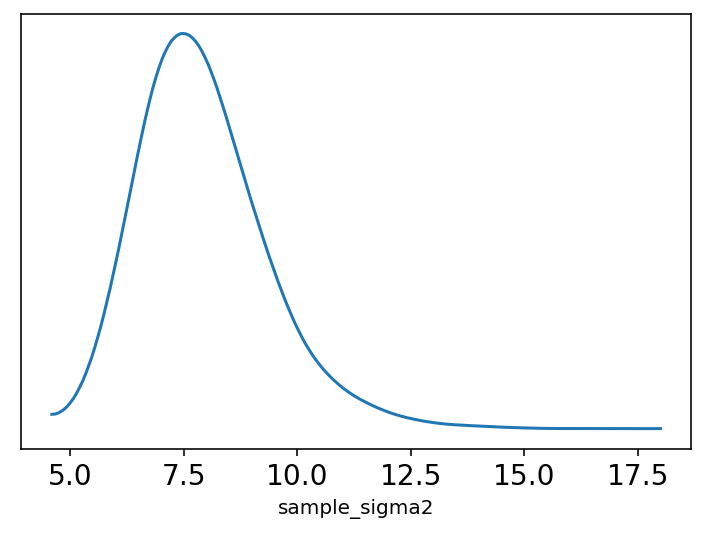

In [43]:
az.plot_kde(sample_sigma2)
plt.xlabel("sample_sigma2")
plt.yticks([]);

#### Code 4.26

We are repeating code 4.7, 4.8 and 4.10

In [44]:
d = pd.read_csv("Data/Howell1.csv", sep=";", header=0)
d2 = d[d.age >= 18]

#### Code 4.27

In [45]:
with pm.Model() as m4_1:
    mu = pm.Normal("mu", mu=178, sd=20)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)

#### Code 4.28

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various samplers. Some samplers are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which starts with a identity mass matrix and then adapts a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [46]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

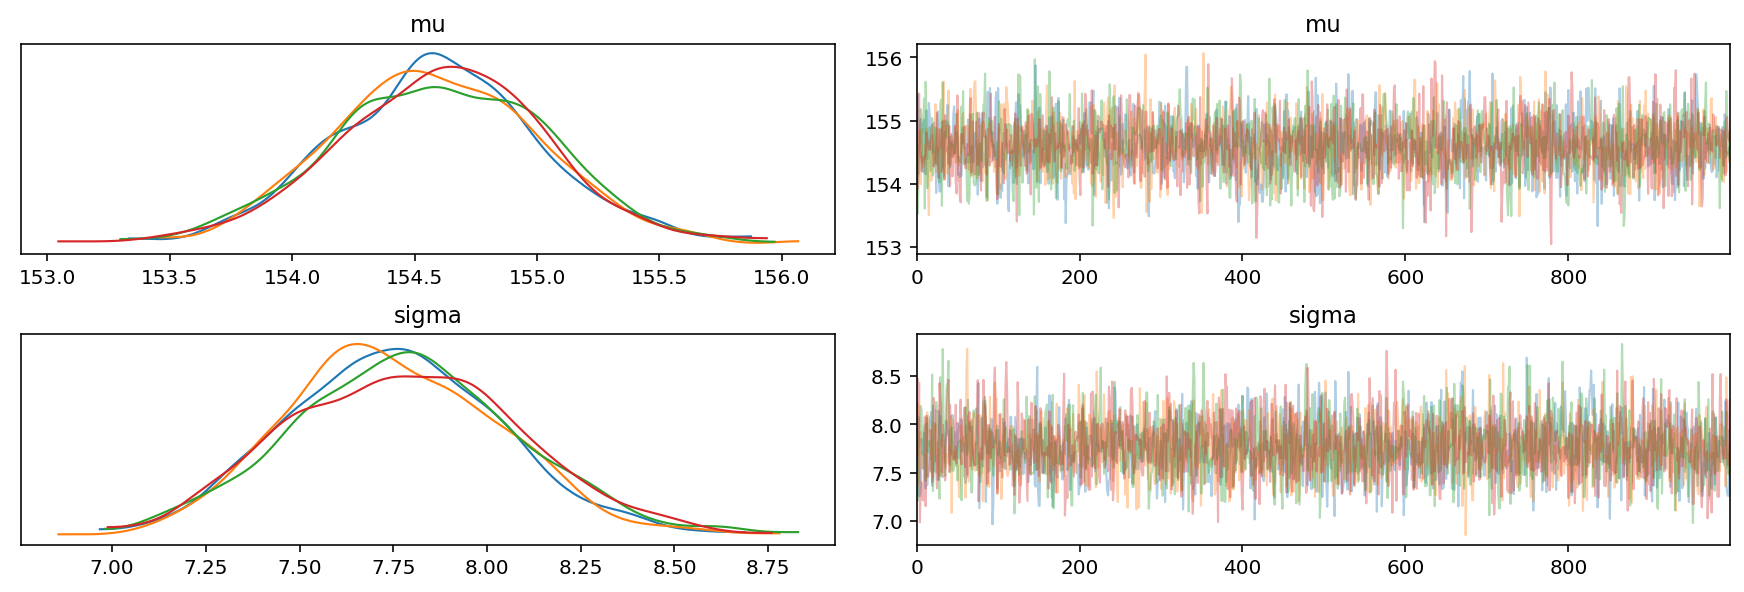

In [47]:
az.plot_trace(trace_4_1)
# this function lets you check the samples values

#### Code 4.29

In [48]:
az.summary(trace_4_1, round_to=2, kind="stats")

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_5.5%,hdi_94.5%
mu,154.60,0.43,153.92,155.26
sigma,7.77,0.29,7.28,8.20


#### Code 4.30

In [49]:
with pm.Model() as m4_1:
    mu = pm.Normal("mu", mu=178, sd=20, testval=d2.height.mean())
    sigma = pm.Uniform("sigma", lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


#### Code 4.31

In [50]:
with pm.Model() as m4_2:
    mu = pm.Normal("mu", mu=178, sd=0.1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)
az.summary(trace_4_2, round_to=2, kind="stats")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_5.5%,hdi_94.5%
mu,177.87,0.10,177.71,178.03
sigma,24.60,0.97,23.13,26.20


#### Code 4.32

For some computations could be nice to have the trace turned into a DataFrame, this can be done using the `trace_to_dataframe` function

In [51]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.172671,0.001316
sigma,0.001316,0.087204


#### Code 4.33

In [52]:
np.diag(trace_df.cov())

array([0.17267109, 0.08720437])

In [53]:
trace_df.corr()

,mu,sigma
mu,1.000000,0.010724
sigma,0.010724,1.000000


#### Code 4.34

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [54]:
trace_df.head()

,mu,sigma
0,154.448182,7.957036
1,154.403591,7.499977
2,154.296771,7.737787
3,154.499752,7.574814
4,154.798424,7.817020


Or directly from the trace (we are getting the first ten samples of _sigma_)

In [55]:
trace_4_1["sigma"][:10]

array([7.95703589, 7.49997704, 7.73778696, 7.5748141 , 7.81701951,
       7.71536597, 7.5404335 , 7.70533245, 7.56345011, 7.85467954])

#### Code 4.35

In our case, this is the same we did in the code 4.27

In [56]:
az.summary(trace_4_1, round_to=2, kind="stats")

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_5.5%,hdi_94.5%
mu,154.61,0.42,153.97,155.30
sigma,7.78,0.30,7.30,8.24


#### Code 4.36

In [57]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[154.77870023,   7.82325318],
       [154.77334274,   8.21625906],
       [154.75591877,   7.39824485],
       [154.27261684,   7.70306304],
       [155.33652781,   7.80660526],
       [154.9022202 ,   7.31133138],
       [154.53404711,   7.77980506],
       [154.28380729,   7.90854065],
       [154.33085524,   7.45125365],
       [154.28257684,   7.2748375 ]])

#### Code 4.37

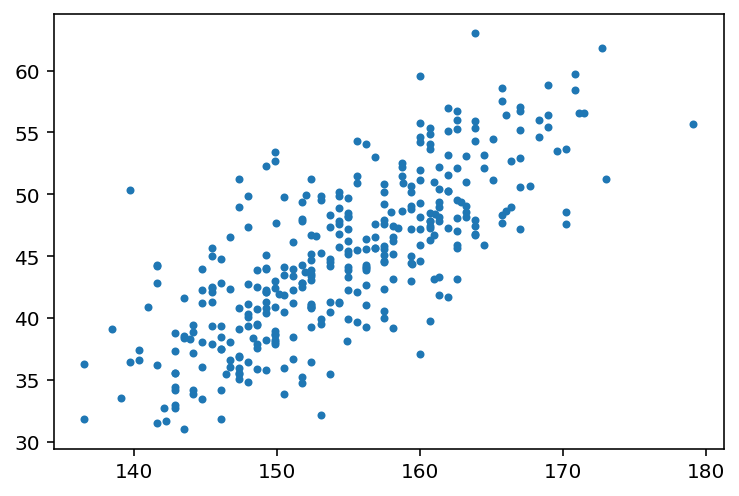

In [58]:
plt.plot(d2.height, d2.weight, ".");

#### Code 4.38

In [59]:
np.random.seed(2971)
N = 100  # 100 lines
a = stats.norm.rvs(178, 20, N)
b = stats.norm.rvs(0, 10, N)

#### Code 4.39 and 4.40

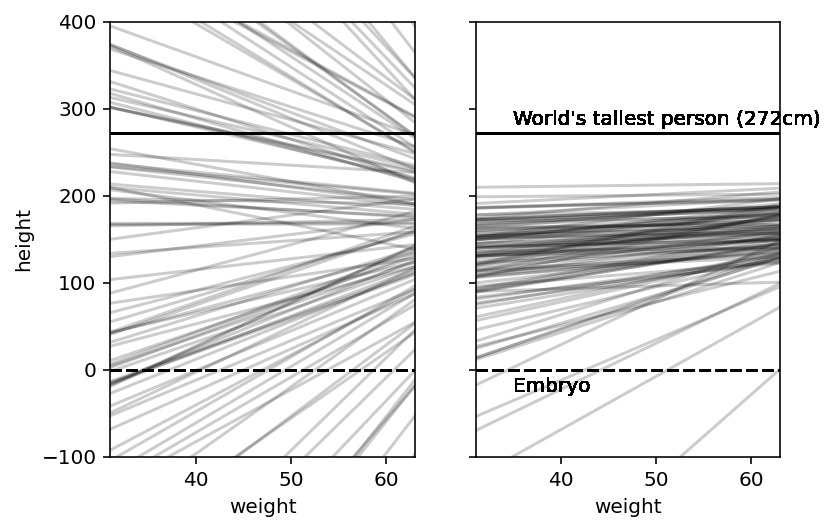

In [60]:
_, ax = plt.subplots(1, 2, sharey=True)
xbar = d2.weight.mean()
for i in range(N):
    ax[0].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[0].set_xlim(d2.weight.min(), d2.weight.max())
    ax[0].set_ylim(-100, 400)
    ax[0].axhline(0, c="k", ls="--")
    ax[0].axhline(272, c="k")
    ax[0].set_xlabel("weight")
    ax[0].set_ylabel("height")

b = stats.lognorm.rvs(s=1, scale=1, size=100)
for i in range(N):
    ax[1].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[1].set_xlim(d2.weight.min(), d2.weight.max())
    ax[1].set_ylim(-100, 400)
    ax[1].axhline(0, c="k", ls="--", label="embryo")
    ax[1].axhline(272, c="k")
    ax[1].set_xlabel("weight")
    ax[1].text(x=35, y=282, s="World's tallest person (272cm)")
    ax[1].text(x=35, y=-25, s="Embryo");

#### Code 4.42

In [61]:
with pm.Model() as m4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + b * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [62]:
with pm.Model() as m4_3b:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Normal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + np.exp(b) * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_3b = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


#### Code 4.44

In [63]:
az.summary(trace_4_3, kind="stats")

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_5.5%,hdi_94.5%
a,154.600,0.275,154.172,155.054
b,0.905,0.044,0.832,0.970
sigma,5.104,0.200,4.787,5.413


#### Code 4.45

In [64]:
trace_4_3_df = pm.trace_to_dataframe(trace_4_3)
trace_4_3_df.cov().round(3)

,a,b,sigma
a,0.076,0.000,0.001
b,0.000,0.002,0.000
sigma,0.001,0.000,0.040


#### Code 4.46

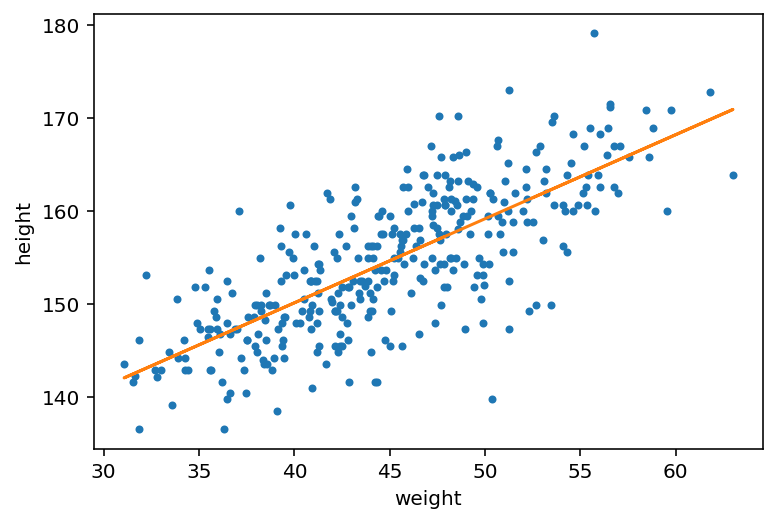

In [65]:
plt.plot(d2.weight, d2.height, ".")
plt.plot(d2.weight, trace_4_3["a"].mean() + trace_4_3["b"].mean() * (d2.weight - xbar))
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

#### Code 4.47

In [66]:
trace_4_3_df.head(5)

,a,b,sigma
0,154.488389,0.866504,5.087577
1,154.488389,0.866504,5.087577
2,154.488389,0.866504,5.087577
3,154.626855,0.900226,5.264752
4,154.700347,0.902874,5.188954


#### Code 4.48

In [67]:
N = [10, 50, 150, 352][0]
dN = d2[:N]
with pm.Model() as m_N:
    a = pm.Normal("a", mu=178, sd=100)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = pm.Deterministic("mu", a + b * (dN.weight - dN.weight.mean()))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN.height)
    trace_N = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


#### Code 4.49

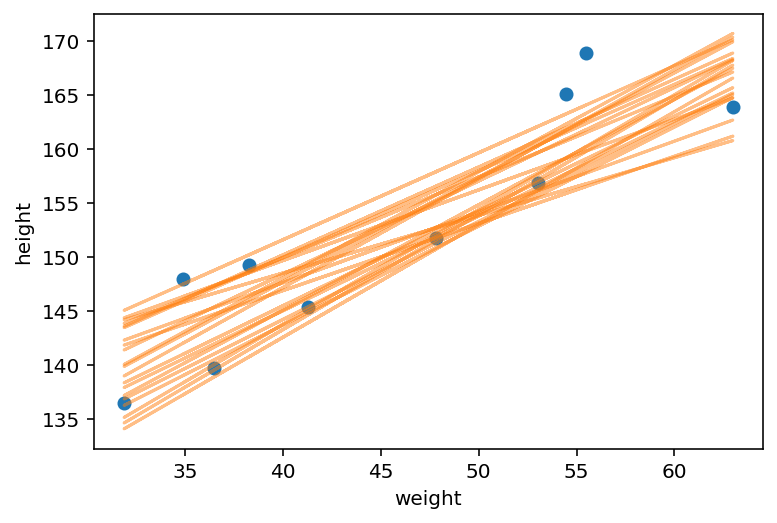

In [68]:
plt.plot(dN.weight, dN.height, "C0o")
idxs = np.random.randint(len(trace_N), size=20)
for idx in idxs:
    plt.plot(
        dN.weight,
        trace_N["a"][idx] + trace_N["b"][idx] * (dN.weight - dN.weight.mean()),
        "C1-",
        alpha=0.5,
    )
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

Alternative we can directly use the deterministic `mu` variable

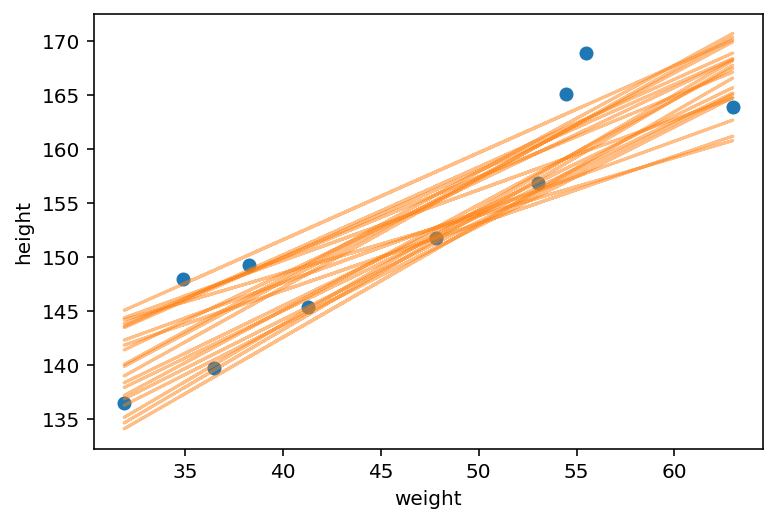

In [69]:
plt.plot(dN.weight, dN.height, "C0o")
for idx in idxs:
    plt.plot(d2.weight[:N], trace_N["mu"][idx], "C1-", alpha=0.5)
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

#### Code 4.50

In [70]:
mu_at_50 = trace_4_3["a"] + trace_4_3["b"] * (50 - d2.weight.mean())

#### Code 4.51

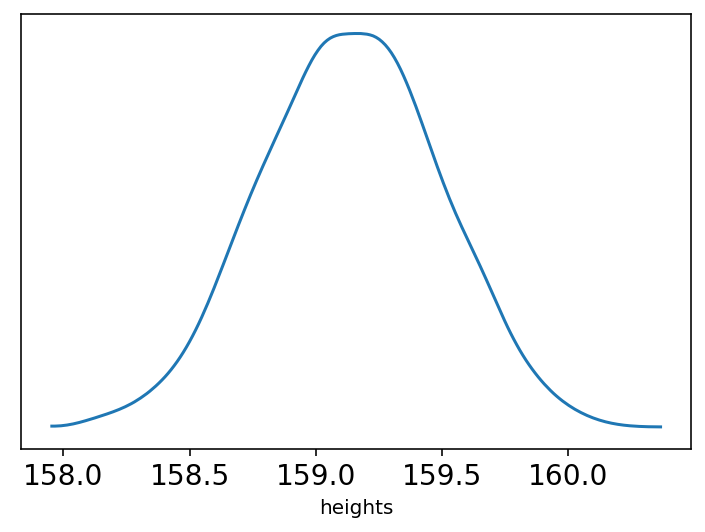

In [71]:
az.plot_kde(mu_at_50)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.52

In [72]:
az.hpd(mu_at_50)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


array([158.58239749, 159.69999401])

#### Code 4.53 and 4.54

We are doing _manually_, in the book is done using the ```link``` function. In the book on code 4.58 the following operations are performed _manually_.

In [73]:
weight_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
trace_4_3_thinned = trace_4_3[::10]
mu_pred = np.zeros((len(weight_seq), len(trace_4_3_thinned) * trace_4_3.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = trace_4_3_thinned["a"] + trace_4_3_thinned["b"] * (
        w - d2.weight.mean()
    )

#### Code 4.55

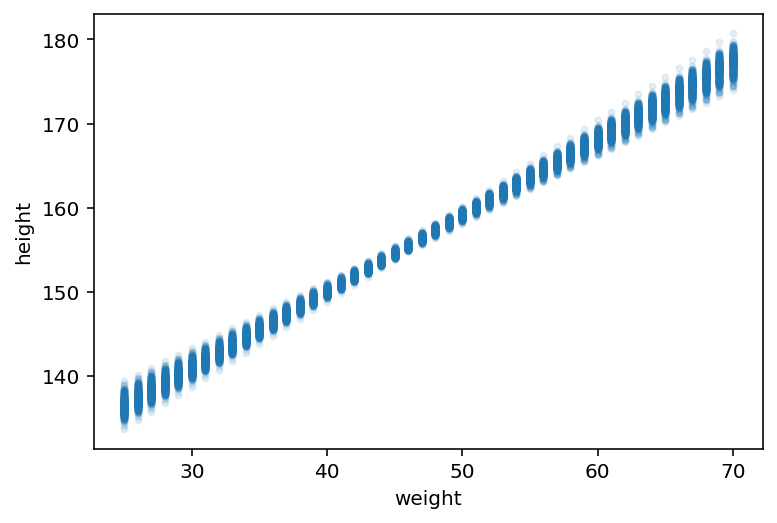

In [74]:
plt.plot(weight_seq, mu_pred, "C0.", alpha=0.1)
plt.xlabel("weight")
plt.ylabel("height");

#### Code 4.56

In [75]:
mu_mean = mu_pred.mean(1)
mu_hpd = az.hpd(mu_pred.T)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


#### Code 4.57

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


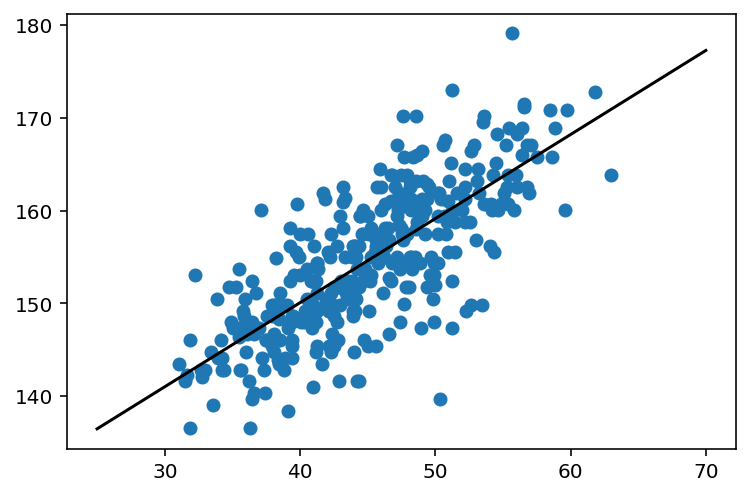

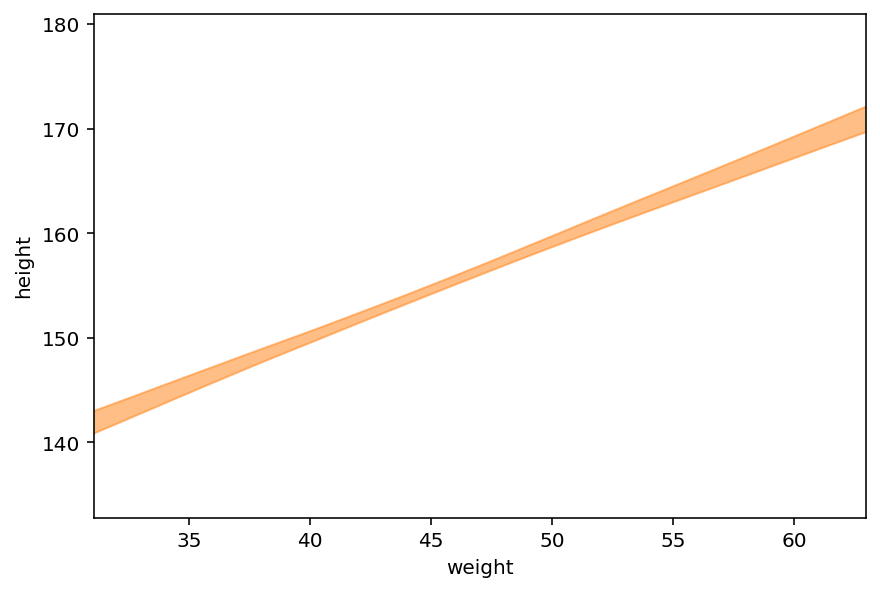

In [76]:
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
az.plot_hpd(weight_seq, mu_pred.T)
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.59

Now we are going to use ```sample_posterior_predictive()``` from PyCM3. This function gives us posterior predictive samples, that is for each value of the input variable we get a sample (from the posterior) of the output variable. Thus in the following example the shape of `height_pred['height'].shape is (200, 352)`

In [77]:
height_pred = pm.sample_posterior_predictive(trace_4_3, 200, m4_3)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


#### Code 4.60

In [78]:
height_pred_hpd = az.hpd(height_pred["height"])

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


#### Code 4.61

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


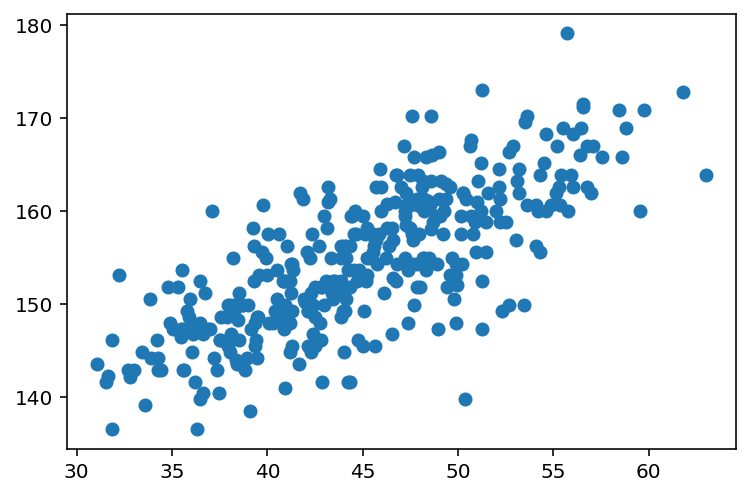

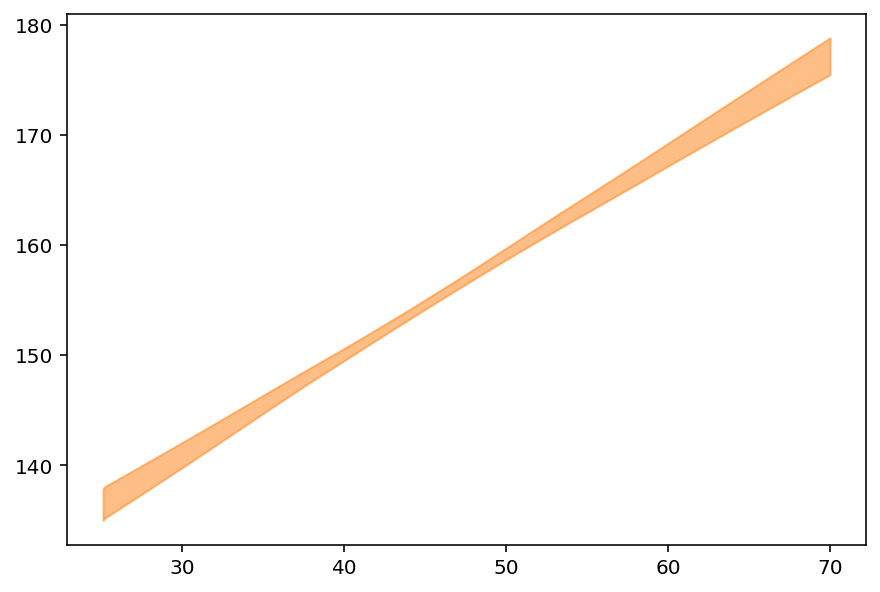

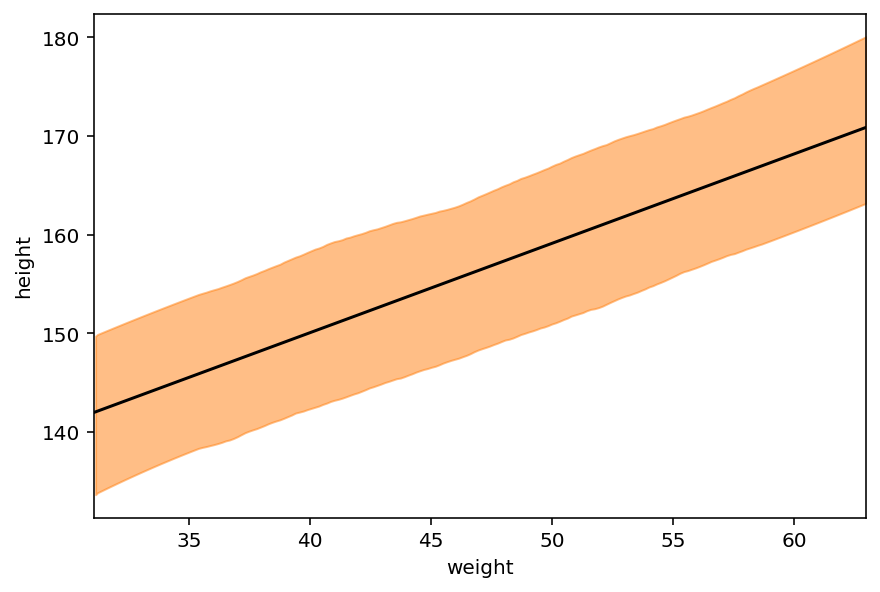

In [79]:
plt.scatter(d2.weight, d2.height)
az.plot_hpd(weight_seq, mu_pred.T)
az.plot_hpd(d2.weight, height_pred["height"])
plt.plot(weight_seq, mu_mean, "k")
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.62

Change the number of samples used in 4.59 (200) to other values.

#### Code 4.63

Now we are going to generate heights from the posterior *manually*. Instead of restricting ourselves to the input values, we are going to pass an array of equally spaced weights values, called `weight_seg`.

In [80]:
weight_seq = np.arange(25, 71)
post_samples = []
for _ in range(1000):  # number of samples from the posterior
    i = np.random.randint(len(trace_4_3))
    mu_pr = trace_4_3["a"][i] + trace_4_3["b"][i] * (weight_seq - d2.weight.mean())
    sigma_pred = trace_4_3["sigma"][i]
    post_samples.append(np.random.normal(mu_pr, sigma_pred))

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


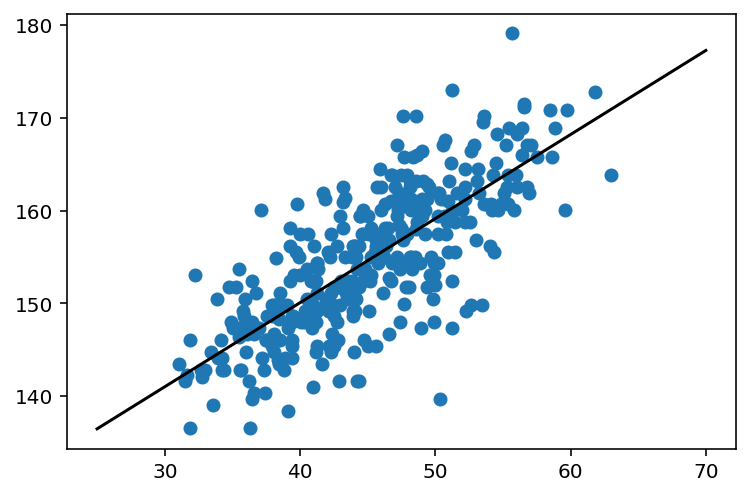

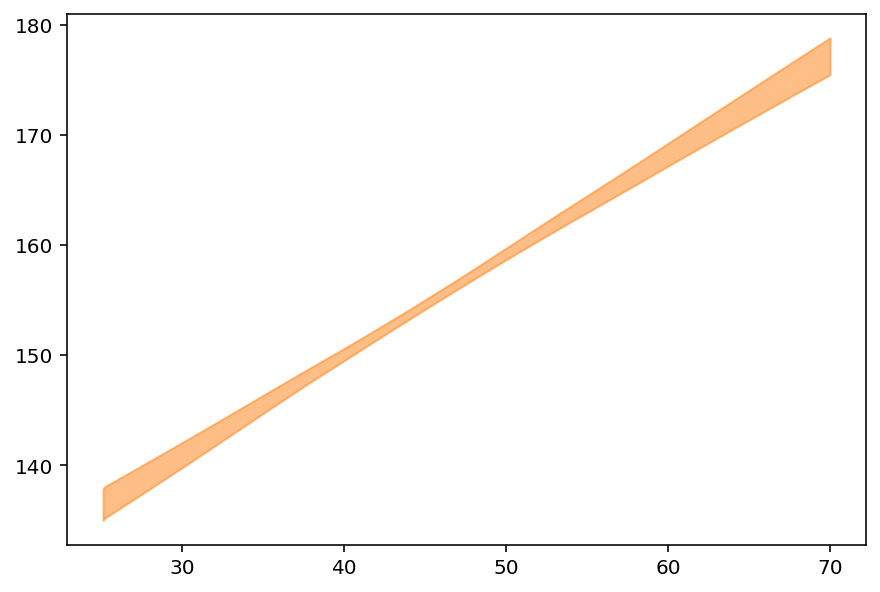

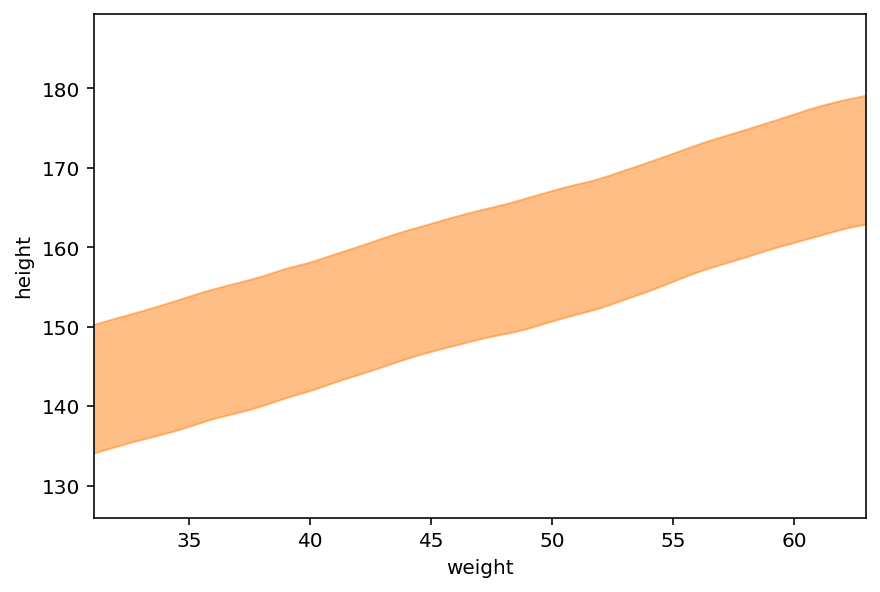

In [81]:
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
az.plot_hpd(weight_seq, mu_pred.T)
az.plot_hpd(weight_seq, np.array(post_samples))
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.64

We have already loaded this dataset, check code 4.7 and 4.8.

In [82]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


#### Code 4.65

In [83]:
d["weight_std"] = (d.weight - d.weight.mean()) / d.weight.std()
d["weight_std2"] = d.weight_std ** 2

with pm.Model() as m_4_5:
    a = pm.Normal("a", mu=178, sd=100)
    b1 = pm.Lognormal("b1", mu=0, sd=1)
    b2 = pm.Normal("b2", mu=0, sd=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + b1 * d.weight_std + b2 * d.weight_std2)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d.height)
    trace_4_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b2, b1, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


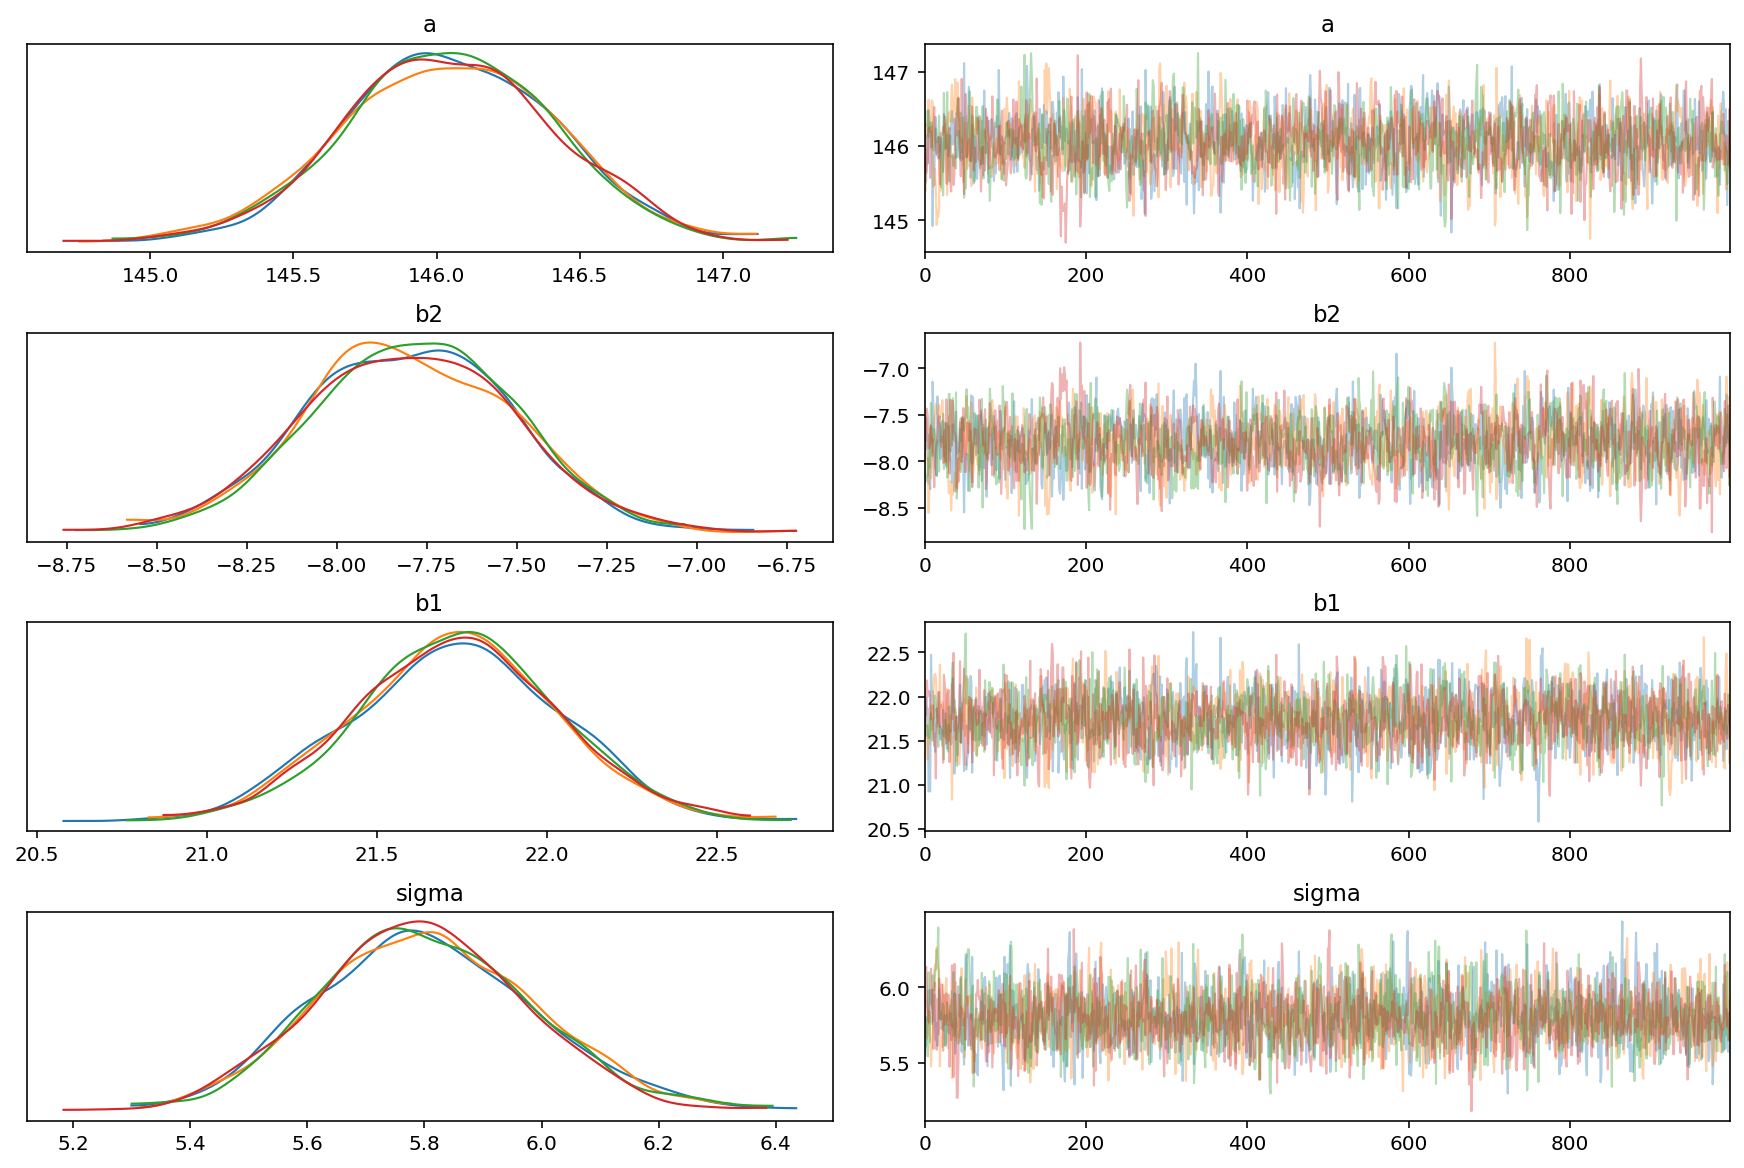

In [84]:
varnames = ["~mu"]
az.plot_trace(trace_4_5, varnames);

#### Code 4.66

In [85]:
az.summary(trace_4_5, varnames, kind="stats", round_to=2)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_5.5%,hdi_94.5%
a,146.05,0.37,145.47,146.63
b2,-7.80,0.28,-8.21,-7.33
b1,21.73,0.30,21.28,22.22
sigma,5.80,0.18,5.53,6.10


#### Code 4.67

In [86]:
mu_pred = trace_4_5["mu"]
height_pred = pm.sample_posterior_predictive(trace_4_5, 200, m_4_5)

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


#### Code 4.68

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


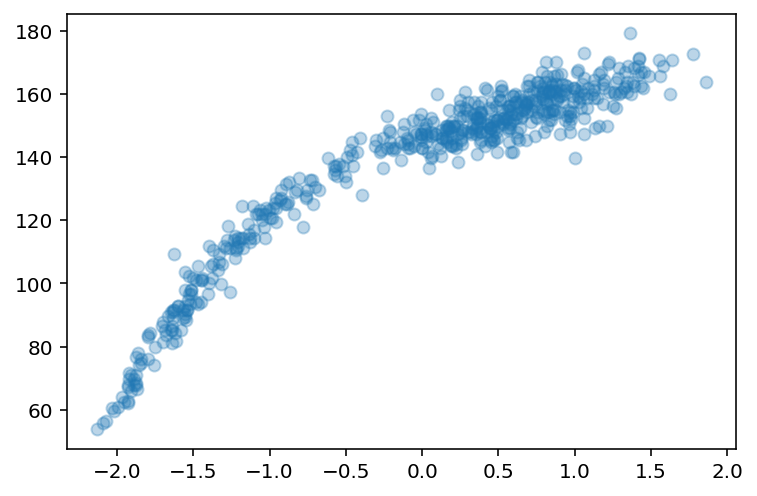

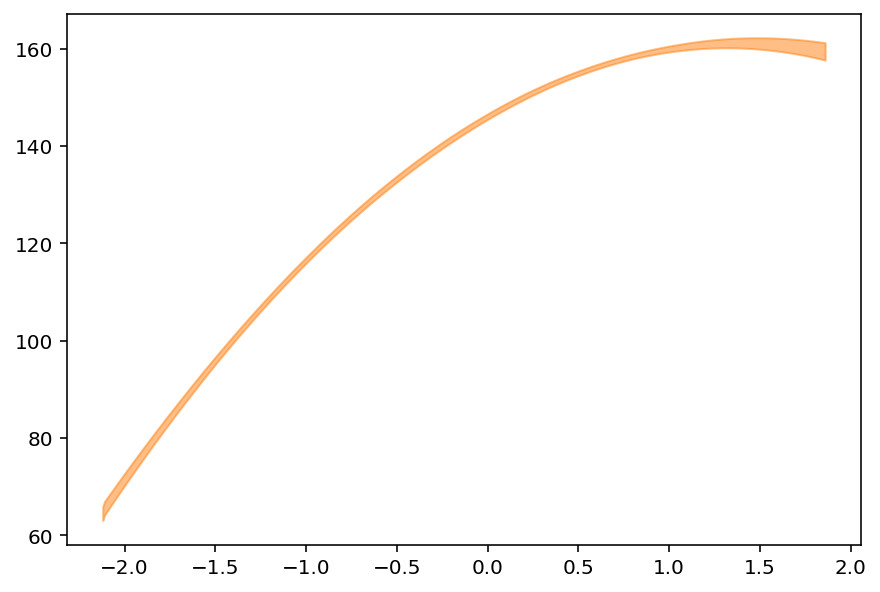

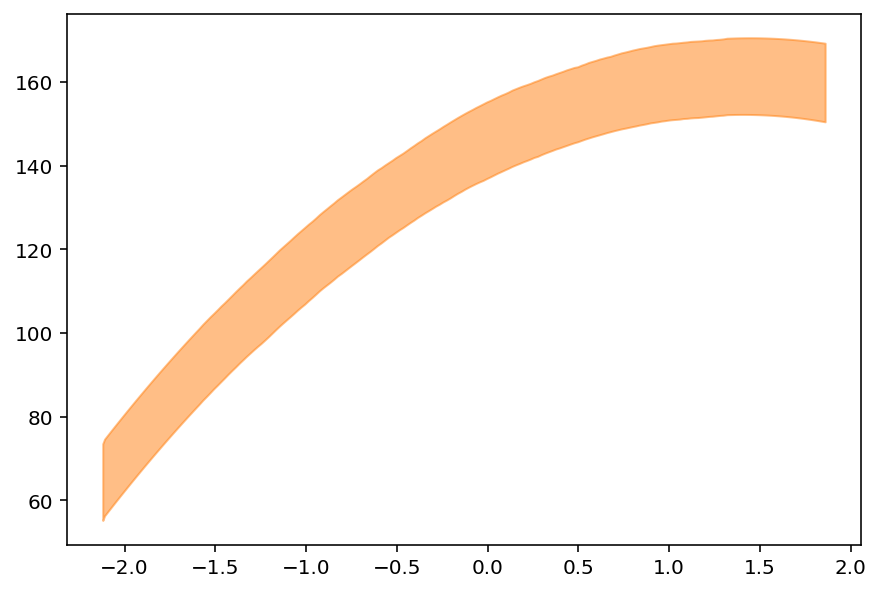

In [87]:
plt.scatter(d.weight_std, d.height, c="C0", alpha=0.3)
az.plot_hpd(d.weight_std, mu_pred)
az.plot_hpd(d.weight_std, height_pred["height"]);

#### Code 4.69

We will stack the weights to get a 2D array, these simplifies wrriting a model. Now we can compute the dot product between beta and the 2D-array

In [88]:
weight_m = np.vstack((d.weight_std, d.weight_std ** 2, d.weight_std ** 3))

In [89]:
with pm.Model() as m_4_6:
    a = pm.Normal("a", mu=178, sd=100)
    b = pm.Normal("b", mu=0, sd=10, shape=3)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + pm.math.dot(b, weight_m))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d.height)
    trace_4_6 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
The acceptance probability does not match the target. It is 0.8903945694684804, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8933030533801961, but should be close to 0.8. Try to increase the number of tuning steps.


#### Code 4.70 and 4.71

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


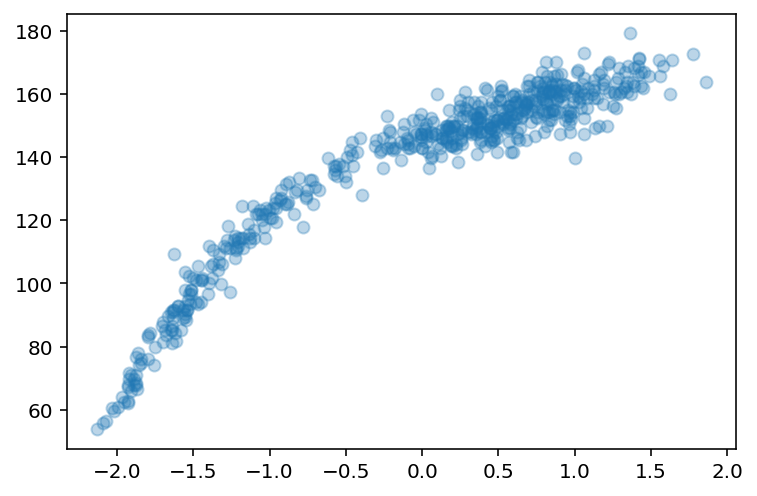

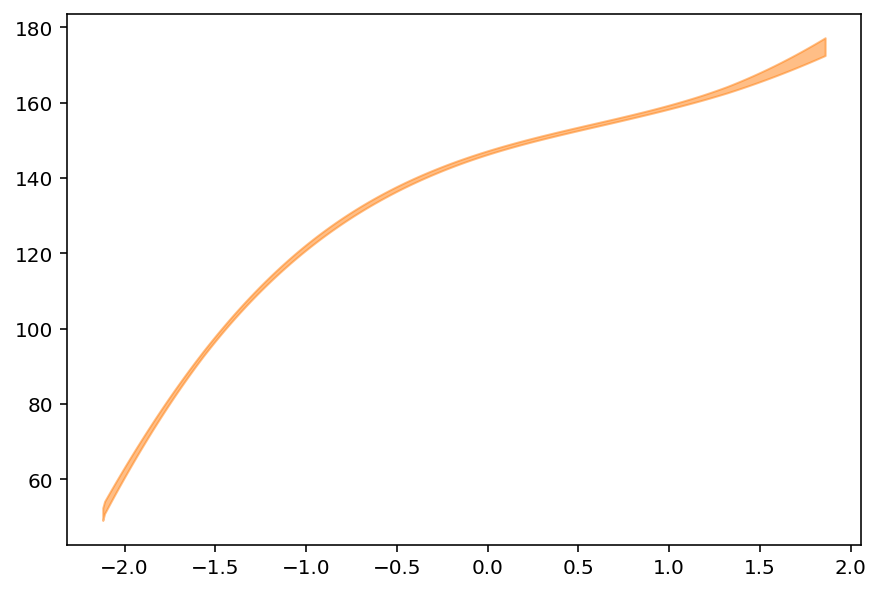

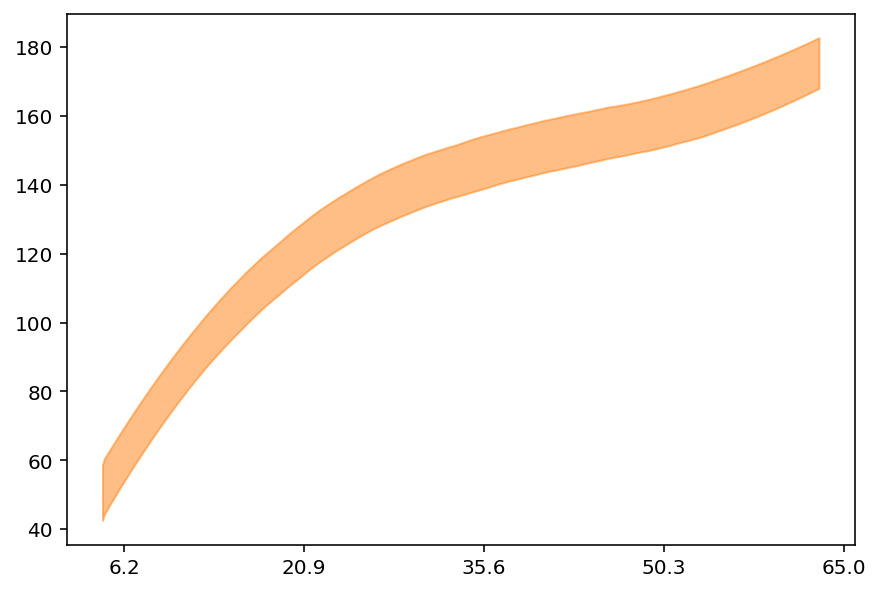

In [90]:
mu_pred = trace_4_6["mu"]
height_pred = pm.sample_posterior_predictive(trace_4_6, 200, m_4_6)

plt.scatter(d.weight_std, d.height, c="C0", alpha=0.3)
az.plot_hpd(d.weight_std, mu_pred)
az.plot_hpd(d.weight_std, height_pred["height"])

at = np.arange(-2, 3)
plt.xticks(at, np.round(at * d.weight.std() + d.weight.mean(), 1));

#### Code 4.72

In [91]:
d = pd.read_csv("Data/cherry_blossoms.csv")
# nans are not treated as in the book
az.summary(d.dropna().to_dict(orient="list"), kind="stats")

,mean,sd,hdi_5.5%,hdi_94.5%
year,1533.395,291.123,1123.00,1978.00
doy,104.921,6.258,95.00,114.00
temp,6.100,0.683,5.00,7.13
temp_upper,6.938,0.812,5.57,7.98
temp_lower,5.264,0.762,4.12,6.40


#### Code 4.73

In [92]:
d2 = d.dropna(subset=["doy"])
num_knots = 15
knot_list = np.quantile(d2.year, np.linspace(0, 1, num_knots))

#### Code 4.74

Here we will use patsy as a simple way of building the b-spline matrix. For more detail please read https://patsy.readthedocs.io/en/latest/spline-regression.html

In [93]:
from patsy import dmatrix

B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2.year.values, "knots": knot_list[1:-1]},
)

#### Code 4.75

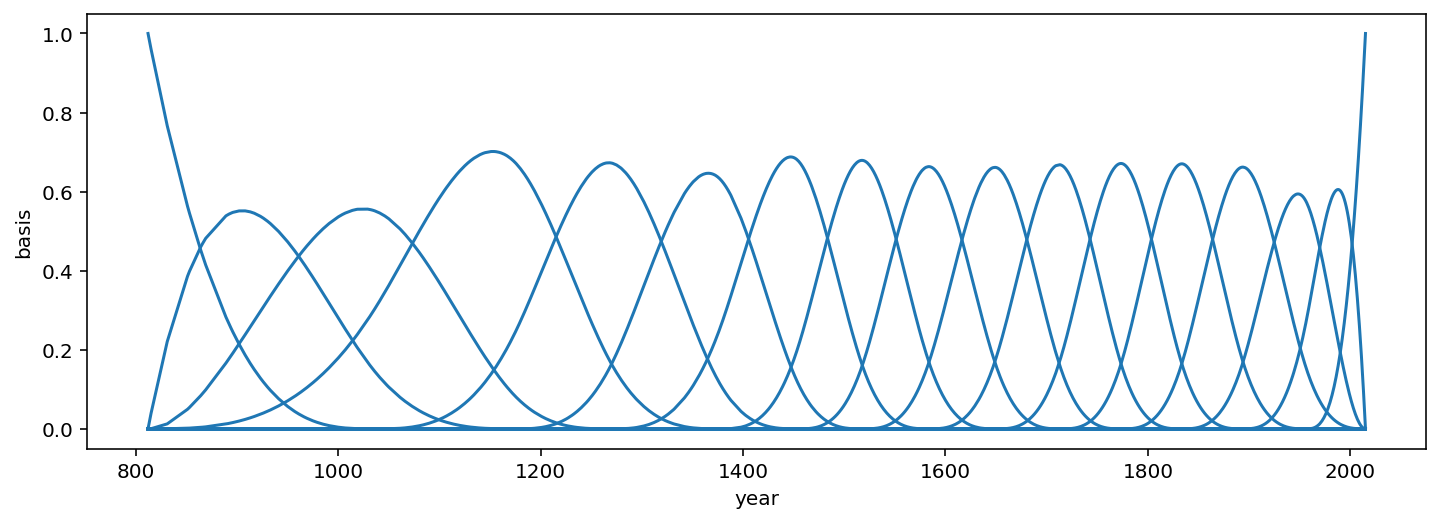

In [94]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
for i in range(17):
    ax.plot(d2.year, (B[:, i]), color="C0")
ax.set_xlabel("year")
ax.set_ylabel("basis");

#### Code 4.76

Note: if the mode gets stall instead of sampling try replacing `mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))` with `mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))`

In [95]:
with pm.Model() as m4_7:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))
    # mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2.doy)
    trace_m4_7 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
The number of effective samples is smaller than 25% for some parameters.


#### Code 4.77

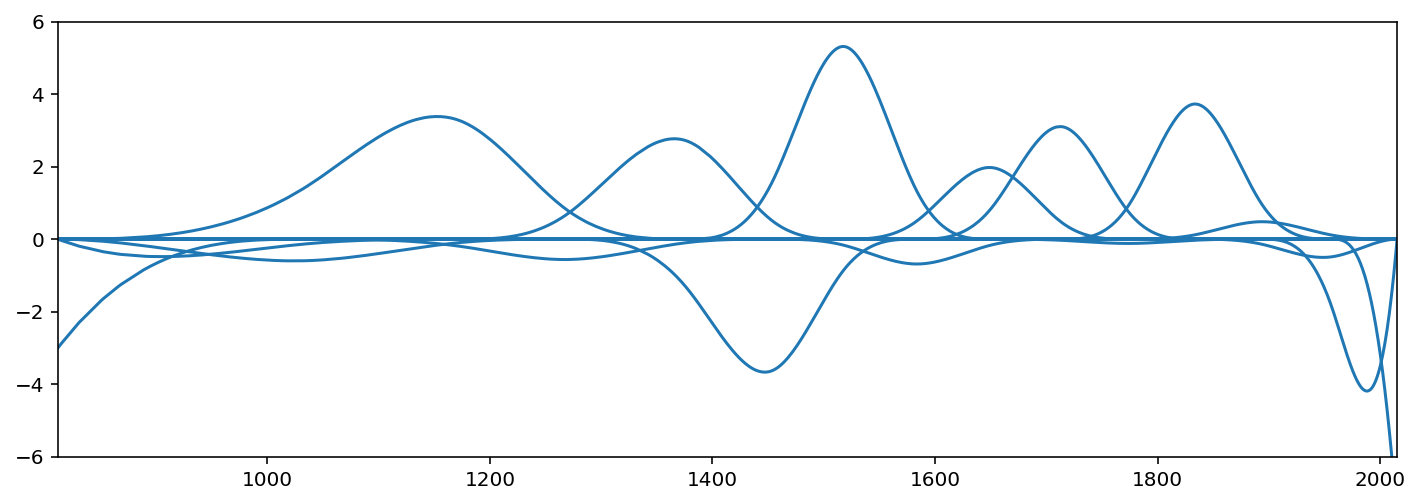

In [96]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
wp = trace_m4_7[w].mean(0)
for i in range(17):
    ax.plot(d2.year, (wp[i] * B[:, i]), color="C0")
ax.set_xlim(812, 2015)
ax.set_ylim(-6, 6);

#### Code 4.78

C:\Users\VIP\anaconda3\envs\p36\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


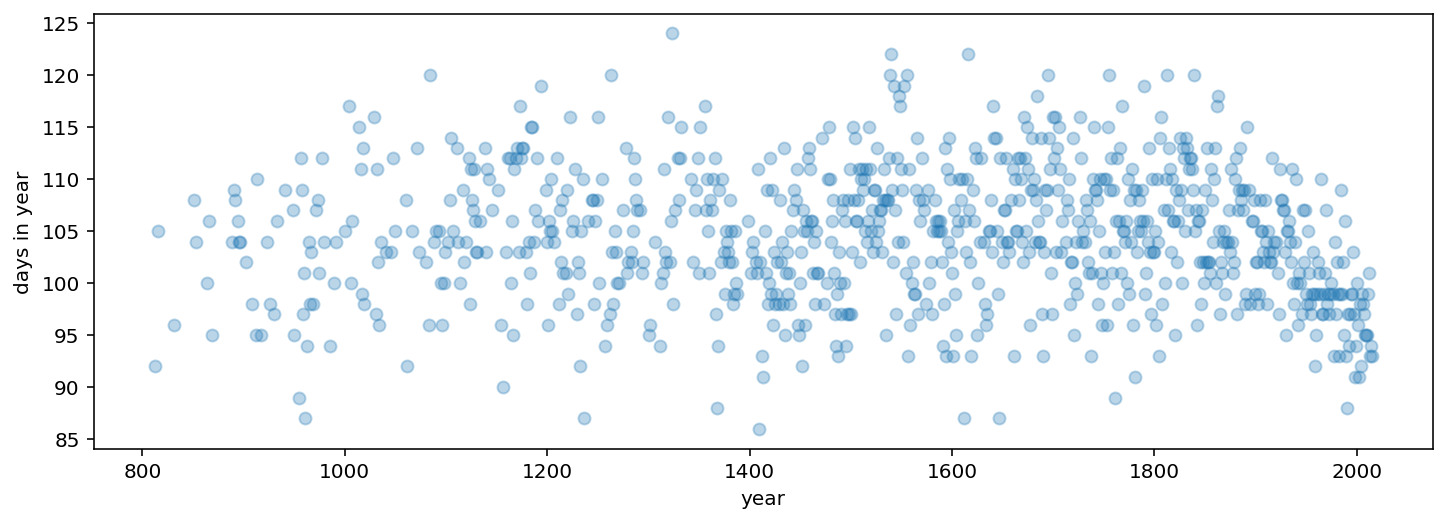

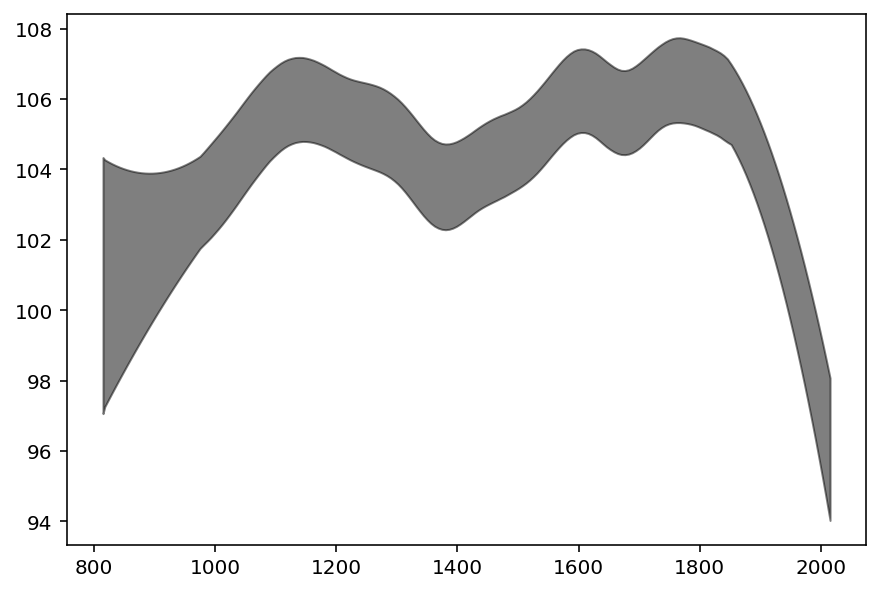

In [97]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(d2.year, d2.doy, "o", alpha=0.3)
az.plot_hpd(d2.year, trace_m4_7["mu"], color="k")
ax.set_xlabel("year")
ax.set_ylabel("days in year");

In [98]:
%watermark -n -u -v -iv -w

numpy   1.19.1
arviz   0.9.0
pymc3   3.9.3
seaborn 0.11.0
pandas  1.1.2
last updated: Sat Sep 19 2020 

CPython 3.6.12
IPython 7.16.1
watermark 2.0.2
